In [36]:
import PIL
from PIL import Image
import numpy as np
from IPython.display import display, clear_output
from sklearn.cluster import KMeans
from numba import njit,prange

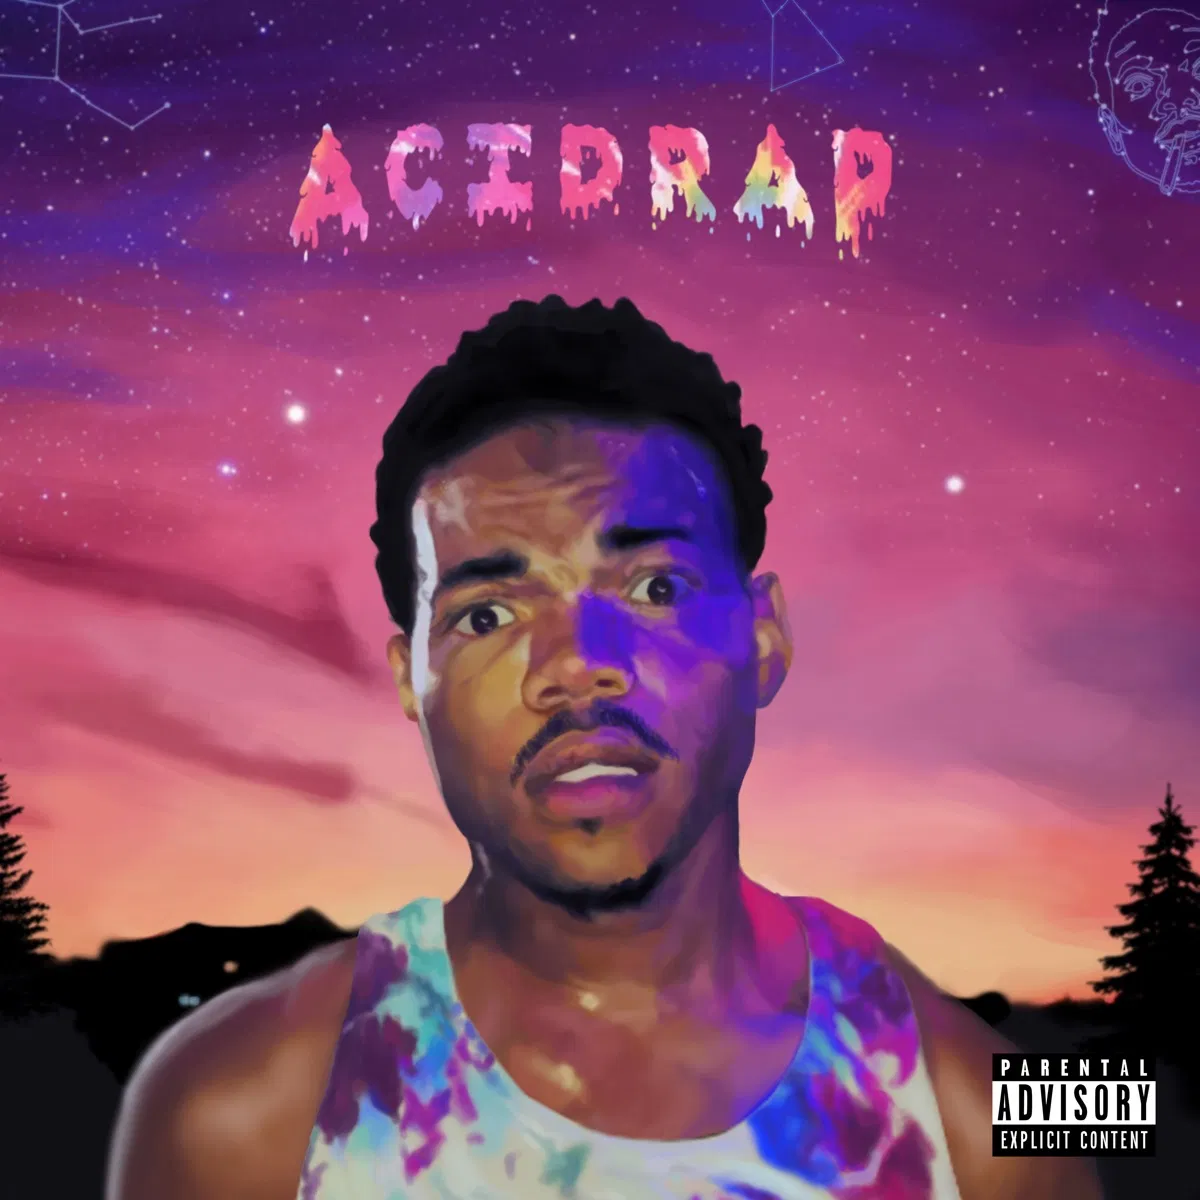

In [42]:
im = Image.open("acid-rap.jpg")
arr = np.asarray(im)
display(im)

In [41]:
s = set()
for i in arr:
    for j in i:
        t = tuple(j)
        s.add(t)
X = np.array([np.array(item, dtype=np.uint8) for item in s])
kmeans = KMeans(n_clusters=16, random_state=0, verbose=0).fit(X)
cc = np.asarray(kmeans.cluster_centers_, dtype=np.uint8)
colmap = {}
for i in range(len(s)):
    colmap[tuple(X[i])] = kmeans.labels_[i] 
newarr = np.zeros(shape=arr.shape, dtype=np.uint8)
for i in range(newarr.shape[0]):
    for j in range(newarr.shape[1]):
        tup = tuple(arr[i][j])
        col = colmap[tup]
        newarr[i][j] = cc[col]
ni = Image.fromarray(newarr)
# display(ni)

In [60]:
shp = arr.shape
arr2 = np.zeros(shp, dtype=np.uint8)
arr3 = np.zeros(shp, dtype=np.uint8)

In [55]:
@njit(parallel=True)
def blur(arr, arr2):
    for i in prange(1,shp[0]-1):
        for j in range(1,shp[1]-1):
            #multiply by 0.2 or else integer overflow
            arr2[i][j] = ((arr[i-1][j]*0.2 + arr[i+1][j]*0.2 + arr[i][j]*0.2 + arr[i][j-1]*0.2 + arr[i][j+1]*0.2)).astype(np.uint8)

In [67]:
blur(arr, arr3)
for i in range(12):
    blur(arr3, arr2)
    blur(arr2, arr3)

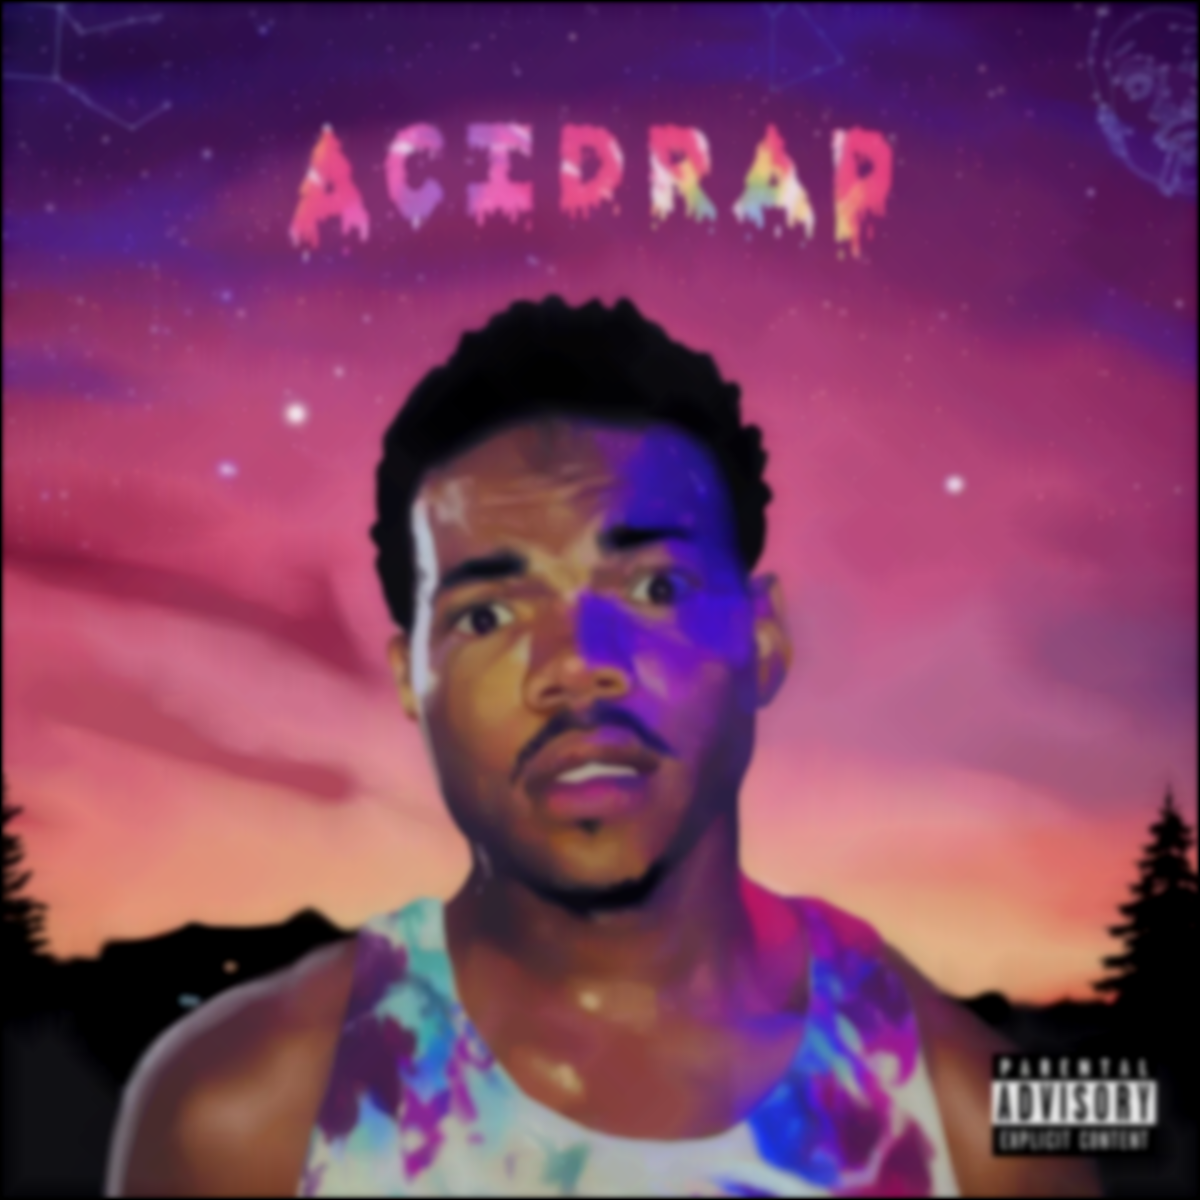

In [68]:
ni2 = Image.fromarray(arr3)
display(ni2)